<a href="https://colab.research.google.com/github/yashkaushik02/CodSoft-ML/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Movie Genre Classification | Link: *https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb*


In [2]:
import numpy as np
import pandas as pd

In [4]:
D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])

<ipython-input-4-8c7a59d40acf>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])


In [5]:
D_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
D_test = pd.read_csv("/content/test_data.txt", sep=":::", names = ["ID","TITLE","DESCRIPTION"])

In [7]:
D_test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [8]:
D_train.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [9]:
D_test.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


# **Data Preprocessing**

In [10]:
D_train.isna()

,TITLE,GENRE,DESCRIPTION
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
54210,False,False,False
54211,False,False,False
54212,False,False,False
54213,False,False,False


In [11]:
D_test.isna()

,ID,TITLE,DESCRIPTION
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
54195,False,False,False
54196,False,False,False
54197,False,False,False
54198,False,False,False


In [12]:
D_train.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [13]:
D_test.isna().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [14]:
D_train.shape

(54214, 3)

In [15]:
D_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


# **EDA**

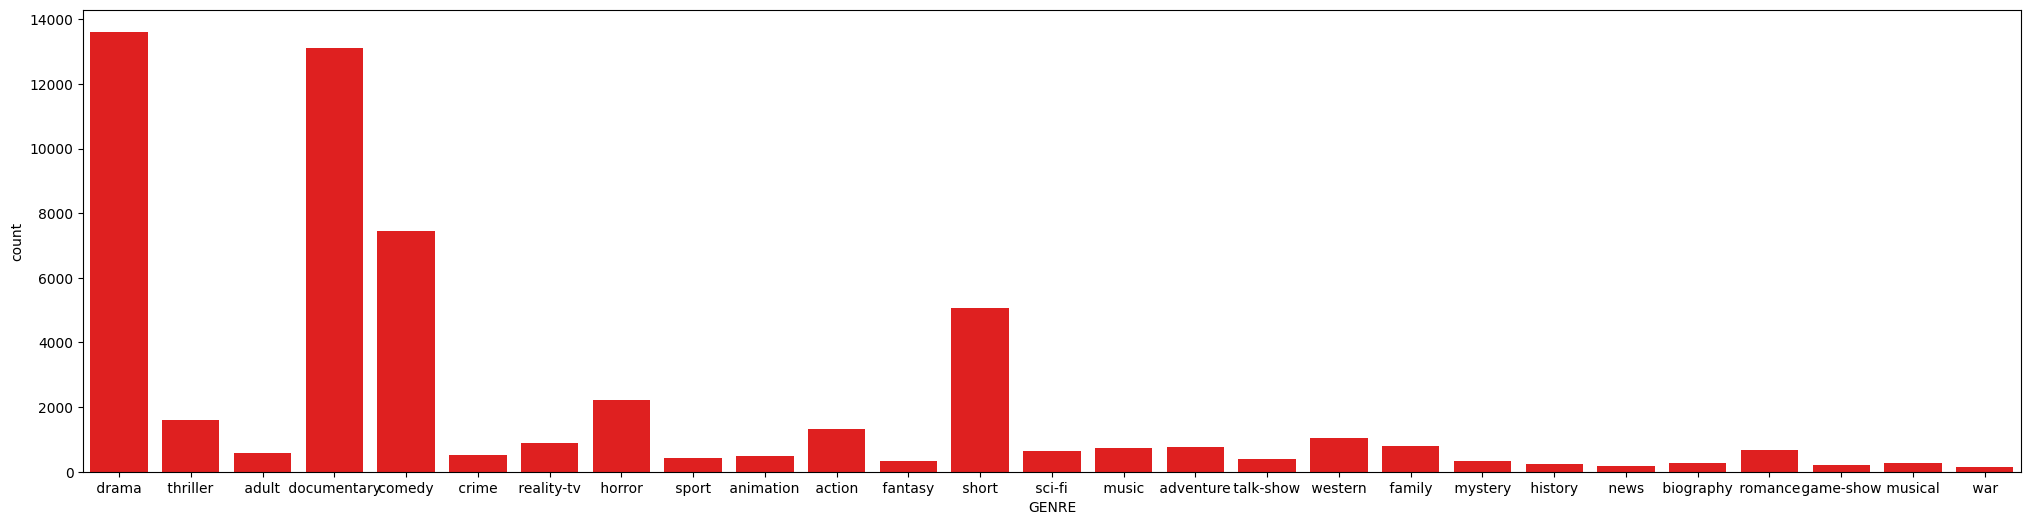

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
sns.countplot(data=D_train, x="GENRE", color = "red")
plt.show()

# **NLP**

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
wnl = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words("english"))
import string

def preproc(text):
    text = text.lower()
    text = "".join([word for word in text if word not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    return text

D_train["DESCRIPTION"] = D_train["DESCRIPTION"].apply(preproc)
D_test["DESCRIPTION"] = D_test["DESCRIPTION"].apply(preproc)

In [21]:
D_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,listening conversation doctor parents 10yearol...
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,films title refers unrecovered bodies ground z...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,shortlived nbc live sitcom centered bonino wor...
54211,Dead Girls Don't Cry (????),horror,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,bestaan echt standup comedy growing facing fea...
54213,Make Your Own Bed (1944),comedy,walter vivian live country difficult time keep...


In [23]:
D_test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),spain march 1964 quico naughty child three bel...
2,3,Off the Beaten Track (2010),one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),known internationally martial arts superstar b...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),movie 169 years making oliver twist artful dod...
54198,54199,Slipstream (1973),popular mysterious rock mike mallard askew bro...


# **Fitting and Transforming**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tf = TfidfVectorizer()
x_train = tf.fit_transform(D_train['DESCRIPTION'])
y_test = tf.fit_transform(D_test['DESCRIPTION'])

In [25]:
x = x_train
y = D_train['GENRE']
x

<54214x149917 sparse matrix of type '<class 'numpy.float64'>'
	with 2639562 stored elements in Compressed Sparse Row format>

In [26]:
y

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: GENRE, Length: 54214, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 30)

# **Logestic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
Train_scores = lr.score(X_train, y_train)
print("Accuracy ", Train_scores * 100)

Accuracy  71.09358788130318


In [31]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([' documentary ', ' short ', ' drama ', ..., ' documentary ',
       ' comedy ', ' drama '], dtype=object)

In [32]:
ac = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", ac * 100)

Accuracy:  57.38264317993176
